# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
# -- (YOUR)MY CODE HERE --
train.isna().sum(), test.isna().sum()

(id             0
 keyword       44
 location    1760
 text           0
 target         0
 dtype: int64,
 id            0
 keyword      17
 location    773
 text          0
 target        0
 dtype: int64)

In [6]:
train = train.fillna("")
test = test.fillna("")
train.isna().sum(), test.isna().sum()

(id          0
 keyword     0
 location    0
 text        0
 target      0
 dtype: int64,
 id          0
 keyword     0
 location    0
 text        0
 target      0
 dtype: int64)

In [7]:
pd.concat([train.head(), test.head()])

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
2644,3796,destruction,,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [8]:
# -- (YOUR)MY CODE HERE --
train['target'].value_counts()

0    3024
1    2305
Name: target, dtype: int64

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [9]:
# -- (YOUR)MY CODE HERE --
popular_keywords = train['keyword'].value_counts()[:10]
popular_keywords

              44
damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
Name: keyword, dtype: int64

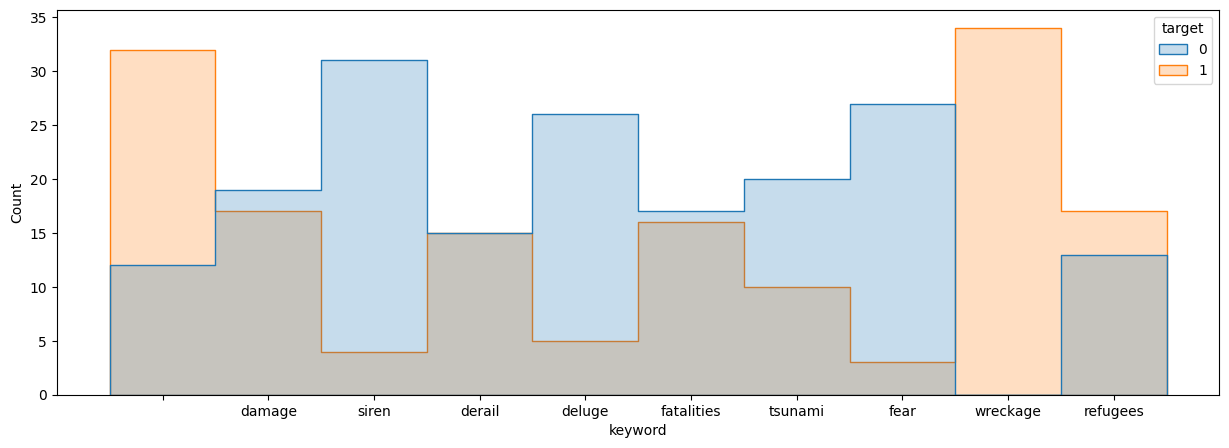

In [10]:
# -- (YOUR)MY CODE HERE --
plt.figure(figsize=(15, 5))
sns.histplot(data=train[train['keyword'].isin(popular_keywords.index)], x="keyword", hue="target", element="step")
plt.show()

**Выводы**:
* по некоторым ключевым словам можно с большой(и даже 100%) уверенностью назвать правильный ответ
* а для некоторых ключевых слов ответ не однозначен и, следовательно, зависит от других факторов

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [11]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [12]:
# -- (YOUR)MY CODE HERE --
df1 = pd.DataFrame(train['keyword'] + ' ' + train['location'] + ' ' + train['text'], columns=['text'])
df2 = pd.DataFrame(train['target'], columns=['target'])
train_new = pd.concat([df1, df2], axis=1)

df1 = pd.DataFrame(test['keyword'] + ' ' + test['location'] + ' ' + test['text'], columns=['text'])
df2 = pd.DataFrame(test['target'], columns=['target'])
test_new = pd.concat([df1, df2], axis=1)

In [13]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# -- (YOUR)MY CODE HERE --
cnt_vec = CountVectorizer()
train_proc = cnt_vec.fit_transform(train_new['text'])

In [15]:
train_proc.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [16]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- (YOUR)MY CODE HERE --
    return any(map(str.isdigit, s))

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- (YOUR)MY CODE HERE --
    return any(map(lambda char: char in punctuation, s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- (YOUR)MY CODE HERE --
    return s[0] == '#'

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- (YOUR)MY CODE HERE --
    return s[0] == '@'

def investigate_vocabulary(vocabulary):
    # -- (YOUR)MY CODE HERE --
    with_digit = sum(map(contains_digit, vocabulary))
    with_punctuation = sum(map(contains_punctuation, vocabulary))
    with_hashtag = sum(map(is_hashtag, vocabulary))
    with_mention = sum(map(is_mention, vocabulary))
    print('With digit:      ', # -- (YOUR)MY CODE HERE --
          with_digit)
    print('With punctuation:', # -- (YOUR)MY CODE HERE --
          with_punctuation)
    print('Hashtags:        ', # -- (YOUR)MY CODE HERE --
          with_hashtag)
    print('Mentions:        ', # -- (YOUR)MY CODE HERE --
          with_mention)


In [17]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [18]:
investigate_vocabulary(# -- (YOUR)MY CODE HERE --
                       cnt_vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [19]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [21]:
# -- (YOUR)MY CODE HERE --
cnt_vec = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
train_proc = cnt_vec.fit_transform(train_new['text'])
train_proc.shape

(5329, 19670)

In [22]:
investigate_vocabulary(# -- (YOUR)MY CODE HERE --
                       cnt_vec.vocabulary_)

With digit:       3939
With punctuation: 7338
Hashtags:         1470
Mentions:         1679


**Сравнение:**
* кол-во слов, которые содержат цифры, почти не изменилось (всего лишь увеличилось на ~150)
* кол-во слов с пунктуацией **значительнейше возросло**
* появилось немалое кол-во слов с хэштегом и слов с упоминанием

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [23]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [24]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- (YOUR)MY CODE HERE --
    return all(map(lambda char: 'a' <= char <= 'z', s)) #return s.isalpha()

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- (YOUR)MY CODE HERE --
    return (all(map(lambda char: char in punctuation, s)) and any(map(lambda char: char in "(){}[]", s)))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- (YOUR)MY CODE HERE --
    return (s[0] == '#' and contains_only_latin_letters(s[1:]))

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- (YOUR)MY CODE HERE --
    s = s.lower()
    tokens = TweetTokenizer().tokenize(s)
    ans = []
    for token in tokens:
        if (contains_only_latin_letters(token) or is_emoji(token) or is_hashtag(token)):
            if (token not in stopwords.words("english")):
                ans.append(token)
    return [SnowballStemmer("english").stem(word) for word in ans]
  

In [27]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [28]:
# -- (YOUR)MY CODE HERE --
#map(lambda text: custom_tokenizer(text), train_new['text'][:10])
print(np.array(train_new['text'][:10].apply(custom_tokenizer)))

[list(['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia'])
 list(['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon'])
 list(['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic'])
 list(['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class'])
 list(['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee'])
 list(['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb'])
 list(['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast'])
 list(['burn', 'except', 'idk', 'realli', 'burn'])
 list(['destroy', '(', 'ask', ')', 'destroy', 'hous'])
 list(['wound', 

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [29]:
vectorizer = CountVectorizer(# -- (YOUR)MY CODE HERE --
                             tokenizer=custom_tokenizer)
# -- (YOUR)MY CODE HERE --
train_proc = vectorizer.fit_transform(train_new['text'])
test_proc = vectorizer.transform(test_new['text'])

train_proc.shape, test_proc.shape

((5329, 10486), (2284, 10486))

2. Обучите LogisticRegression на полученных признаках.


In [30]:
train_proc = pd.DataFrame(train_proc.toarray(), columns=vectorizer.get_feature_names_out())
test_proc = pd.DataFrame(test_proc.toarray(), columns=vectorizer.get_feature_names_out())

In [31]:
from sklearn.linear_model import LogisticRegression
# -- (YOUR)MY CODE HERE --
logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

3. Посчитайте метрику f1-score на тестовых данных.

In [32]:
from sklearn.metrics import f1_score

# -- (YOUR)MY CODE HERE --
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

F1 score: 0.752017213555675


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
# -- (YOUR)MY CODE HERE --
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
train_proc = pd.DataFrame(vectorizer.fit_transform(train_new['text']).toarray(), columns=vectorizer.get_feature_names_out())
test_proc = pd.DataFrame(vectorizer.transform(test_new['text']).toarray(), columns=vectorizer.get_feature_names_out())

logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

print(train_proc.shape, test_proc.shape)
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

(5329, 10486) (2284, 10486)
F1 score: 0.7412353923205343


1. **Ответ:** незначительно снизилось (~0.01).

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [36]:
# 2
# -- (YOUR)MY CODE HERE --
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
train_proc = pd.DataFrame(vectorizer.fit_transform(train_new['text']).toarray(), columns=vectorizer.get_feature_names_out())
test_proc = pd.DataFrame(vectorizer.transform(test_new['text']).toarray(), columns=vectorizer.get_feature_names_out())

logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

print(train_proc.shape, test_proc.shape)
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

(5329, 10486) (2284, 10486)
F1 score: 0.7412353923205343


2. **Ответ:** размер матрицы и f1 никак не изменились, остались ровно такими же.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [38]:
# 3
# -- (YOUR)MY CODE HERE --
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.0003)
train_proc = pd.DataFrame(vectorizer.fit_transform(train_new['text']).toarray(), columns=vectorizer.get_feature_names_out())
test_proc = pd.DataFrame(vectorizer.transform(test_new['text']).toarray(), columns=vectorizer.get_feature_names_out())

logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

print(train_proc.shape, test_proc.shape)
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

(5329, 4527) (2284, 4527)
F1 score: 0.7463848720800891


3. **Ответ:** удалось достичь оочень незначительных улучшений (~0.005), но кол-во признаков сократилось более чем в два раза.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [40]:
from sklearn.feature_extraction.text import HashingVectorizer

# -- (YOUR)MY CODE HERE --
vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
train_proc = pd.DataFrame(vectorizer.fit_transform(train_new['text']).toarray())
test_proc = pd.DataFrame(vectorizer.transform(test_new['text']).toarray())

logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

print(train_proc.shape, test_proc.shape)
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

(5329, 5000) (2284, 5000)
F1 score: 0.7190635451505016


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** CountVectorizer с моим custom_tokenizer показал наилучший результат.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [60]:
# -- (YOUR)MY CODE HERE --
vectorizer = CountVectorizer()
train_proc = pd.DataFrame(vectorizer.fit_transform(train_new['text']).toarray())
test_proc = pd.DataFrame(vectorizer.transform(test_new['text']).toarray())

logreg = LogisticRegression(random_state=42).fit(train_proc, train_new['target'])

print(train_proc.shape, test_proc.shape)
print("F1 score:", f1_score(test_new['target'], logreg.predict(test_proc)))

(5329, 18455) (2284, 18455)
F1 score: 0.7533729087965461
